In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv("processed-data/wheels.csv")

In [3]:
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [4]:
x=dados.drop("inadimplente", axis=1)
y=dados["inadimplente"]

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
modelo=DecisionTreeClassifier()
modelo.fit(x,y)
modelo.score(x,y)

1.0

In [7]:
print(f"Acurácia: {modelo.score(x,y)*100:.2f}%")

Acurácia: 100.00%


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify=y, random_state=5)
x_train, x_validacao, y_train, y_validacao = train_test_split(x, y, stratify=y, random_state=5)

In [10]:
modelo=DecisionTreeClassifier()
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 100.00%
Acurácia de validação: 84.71%


In [11]:
modelo=DecisionTreeClassifier(max_depth=3)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 91.27%
Acurácia de validação: 91.27%


In [12]:
modelo=DecisionTreeClassifier(max_depth=5)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 91.34%
Acurácia de validação: 91.24%


In [13]:
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(x_train, y_train)
print(f"Acurácia de treino: {modelo.score(x_train, y_train)*100:.2f}%")
print(f"Acurácia de validação: {modelo.score(x_validacao, y_validacao)*100:.2f}%")

Acurácia de treino: 92.06%
Acurácia de validação: 90.60%


In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
y_previsto = modelo.predict(x_validacao)
matriz_confusao = confusion_matrix(y_validacao, y_previsto)
print(matriz_confusao)

[[10359   120]
 [  959    43]]


In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

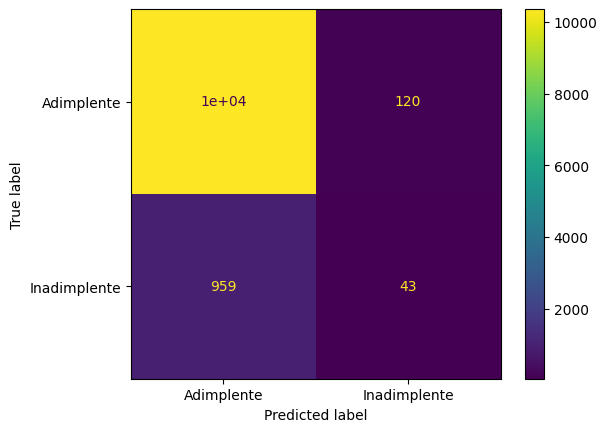

In [17]:
visualizador = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels="Adimplente Inadimplente".split())
visualizador.plot()

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(f"Acurácia: {accuracy_score(y_validacao, y_previsto)*100:.2f}%")

Acurácia: 90.60%


In [20]:
from sklearn.metrics import precision_score, recall_score

In [21]:
print(f"Precisão: {precision_score(y_validacao, y_previsto)*100:.2f}%")
print(f"Recall: {recall_score(y_validacao, y_previsto)*100:.2f}%")

Precisão: 26.38%
Recall: 4.29%


In [22]:
from sklearn.metrics import f1_score

In [23]:
print(f"F1 Score: {f1_score(y_validacao, y_previsto)*100:.2f}%")

F1 Score: 7.38%


In [24]:
from sklearn.metrics import RocCurveDisplay

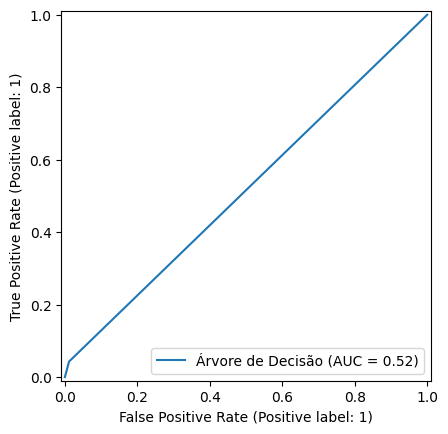

In [25]:
RocCurveDisplay.from_predictions(y_validacao, y_previsto, name="Árvore de Decisão");

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
print(f"AUC: {roc_auc_score(y_validacao, y_previsto)*100:.2f}%")

AUC: 51.57%


In [28]:
from sklearn.metrics import PrecisionRecallDisplay

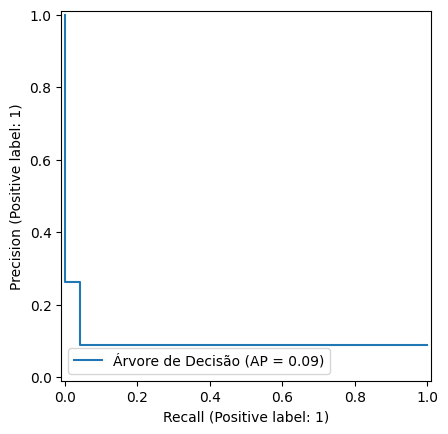

In [29]:
PrecisionRecallDisplay.from_predictions(y_validacao, y_previsto, name="Árvore de Decisão");

In [30]:
from sklearn.metrics import average_precision_score

In [31]:
print(f"AP: {average_precision_score(y_validacao, y_previsto)*100:.2f}%")

AP: 9.49%


In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_validacao, y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.52      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [34]:
from sklearn.model_selection import cross_validate, KFold

In [35]:
modelo=DecisionTreeClassifier(max_depth=10)
kf=KFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(modelo, x, y, cv=kf)
cv_results

{'fit_time': array([0.19482303, 0.16864657, 0.17886209, 0.20884609, 0.20606422]),
 'score_time': array([0.00209212, 0.00205421, 0.00223517, 0.00268769, 0.00243878]),
 'test_score': array([0.91257485, 0.90766551, 0.90766551, 0.91321864, 0.89884582])}

In [36]:
cv_results["test_score"]

array([0.91257485, 0.90766551, 0.90766551, 0.91321864, 0.89884582])

In [37]:
cv_results["test_score"].mean()

np.float64(0.9079940641365353)

In [38]:
media = cv_results["test_score"].mean()
desvio_padrao = cv_results["test_score"].std()
print(f"Acurácia média: {media*100:.2f}%")
print(f"Intervalo de confiança: {media*100:.2f}% ± {desvio_padrao*100:.2f}%")

Acurácia média: 90.80%
Intervalo de confiança: 90.80% ± 0.51%


In [39]:
def intervalo_conf(resultados):
    media = resultados["test_score"].mean()
    desvio_padrao = resultados["test_score"].std()
    print(f"Acurácia média: {media*100:.2f}%")
    print(f"Intervalo de confiança: [{media-2*desvio_padrao:.2f}, {min(media+2*desvio_padrao, 1):.2f}]")

In [40]:
modelo=DecisionTreeClassifier(max_depth=10)
kf=KFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(modelo, x, y, cv=kf, scoring="recall")
cv_results

{'fit_time': array([0.176121  , 0.1779635 , 0.16974545, 0.17314053, 0.17568564]),
 'score_time': array([0.00417018, 0.0039525 , 0.00371885, 0.00327349, 0.00439286]),
 'test_score': array([0.02642008, 0.01856436, 0.02091021, 0.0156658 , 0.02312139])}

In [41]:
intervalo_conf(cv_results)

Acurácia média: 2.09%
Intervalo de confiança: [0.01, 0.03]


In [42]:
dados["inadimplente"].value_counts(normalize=True)

inadimplente
0    0.912707
1    0.087293
Name: proportion, dtype: float64

In [43]:
from sklearn.model_selection import StratifiedKFold

In [44]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(modelo, x, y, cv=skf, scoring="recall")

In [45]:
cv_results

{'fit_time': array([0.17793608, 0.17371035, 0.16925144, 0.1960063 , 0.18718457]),
 'score_time': array([0.00369   , 0.00433254, 0.00382519, 0.00364137, 0.00363207]),
 'test_score': array([0.03740648, 0.02621723, 0.03366584, 0.02493766, 0.02743142])}

In [46]:
intervalo_conf(cv_results)

Acurácia média: 2.99%
Intervalo de confiança: [0.02, 0.04]


In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
oversample = SMOTE()
x_resampled, y_resampled = oversample.fit_resample(x, y)

In [49]:
y_resampled.value_counts(normalize=True)

inadimplente
0    0.5
1    0.5
Name: proportion, dtype: float64

In [50]:
modelo=DecisionTreeClassifier(max_depth=10)
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(modelo, x_resampled, y_resampled, cv=skf, scoring="recall")

In [51]:
intervalo_conf(cv_results)

Acurácia média: 72.41%
Intervalo de confiança: [0.71, 0.74]


In [52]:
from imblearn.pipeline import Pipeline as ImbPipeline

In [53]:
modelo=DecisionTreeClassifier(max_depth=10)
pipeline=ImbPipeline([("oversample", SMOTE()), ("árvore", modelo)])

In [54]:
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(pipeline, x, y, cv=skf, scoring="recall")

In [55]:
intervalo_conf(cv_results)

Acurácia média: 26.39%
Intervalo de confiança: [0.18, 0.34]


In [56]:
from imblearn.under_sampling import NearMiss

In [57]:
modelo=DecisionTreeClassifier(max_depth=10)
pipeline=ImbPipeline([("undersample", NearMiss(version=3)), ("árvore", modelo)])
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=5)
cv_results=cross_validate(pipeline, x, y, cv=skf, scoring="recall")

In [58]:
intervalo_conf(cv_results)

Acurácia média: 66.20%
Intervalo de confiança: [0.62, 0.70]


              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



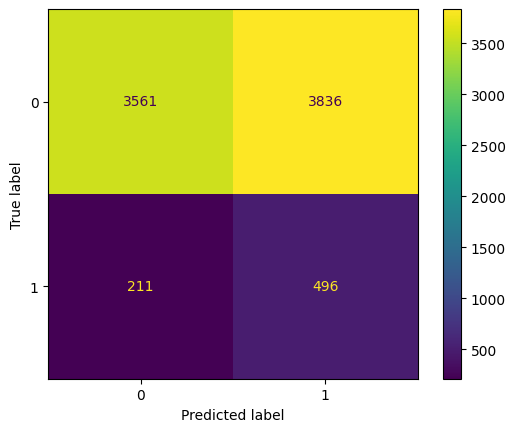

In [59]:
undersample = NearMiss(version=3)
x_resampled, y_resampled = undersample.fit_resample(x, y)
modelo=DecisionTreeClassifier(max_depth=10)
modelo.fit(x_resampled, y_resampled)
y_previsto = modelo.predict(x_teste)
print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);